# Clustering of crystal size in liquid-phase exfoliated (LPE) MoS$_2$

The liquid phase exfoliation method is widely applied on layered materials to obtain few and mono-layered version of nanomaterials.
This script allows the analysis of the crystal size in LPE molybdenum disulfide (MoS$_2$). 


## Import the relevant libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
from sklearn import preprocessing
from sklearn.cluster import KMeans

## Load the data

Load data from the csv file: <i> 'iris_dataset.csv'</i>.

In [2]:
# Load the data
data = pd.read_csv('LPE_data.csv')
# Check the data
data

,thickness (nm),width (nm)
0,6.00,275.0
1,3.00,700.0
2,5.60,1590.0
3,1.61,207.9
4,1.30,500.0
5,2.00,975.0
6,3.60,1200.0
7,7.60,212.0
8,7.60,172.0
9,2.50,90.0


## Plot the data

Let us begin by plotting the relevant data

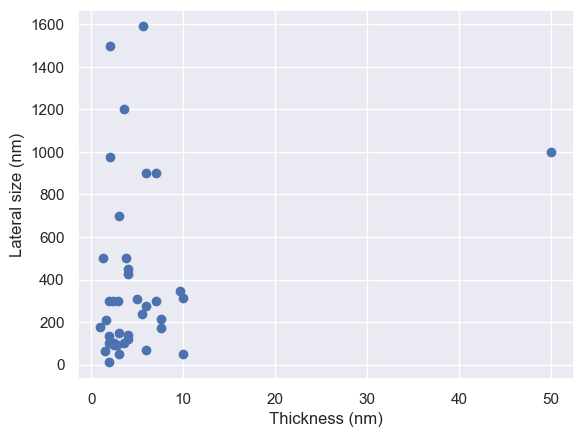

In [10]:
# create a scatter plot based on two corresponding features (thickness and lateral size of the nanosheets)
plt.scatter(data['thickness (nm)'],data['width (nm)'])
# name the axes
plt.xlabel('Thickness (nm)')
plt.ylabel('Lateral size (nm)')
plt.show()

## Standardize the variables

In [5]:
# scale the data for better results
x_scaled = preprocessing.scale(data)
x_scaled

array([[ 0.09549954, -0.28153518],
       [-0.3011756 ,  0.79064342],
       [ 0.04260952,  3.03591156],
       [-0.48496841, -0.45081326],
       [-0.52595818,  0.28608879],
       [-0.43340064,  1.48440605],
       [-0.22184057,  2.05203002],
       [ 0.30705961, -0.44046989],
       [ 0.30705961, -0.54138082],
       [-0.36728812, -0.74824822],
       [-0.16895055, -0.66751948],
       [-0.19539556,  0.28608879],
       [-0.03672551, -0.19323812],
       [-0.16895055,  0.0968808 ],
       [-0.44662315, -0.95007008],
       [-0.44662315, -0.63220065],
       [-0.44662315, -0.21846585],
       [-0.56562569, -0.5338125 ],
       [ 0.22772459, -0.21846585],
       [ 0.09549954,  1.29519806],
       [ 0.02938702, -0.36983224],
       [-0.16895055, -0.62210956],
       [ 0.58473221, -0.09737274],
       [ 5.91340155,  1.54747538],
       [-0.16895055,  0.15995013],
       [-0.43340064,  2.80886198],
       [-0.49951317, -0.81131755],
       [-0.43340064, -0.72302049],
       [-0.44662315,

## Clustering (scaled data)

In [6]:
# create a k-means object with 2 clusters
kmeans_scaled = KMeans(2)
# fit the data
kmeans_scaled.fit(x_scaled)

C:\Users\danie\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


KMeans(n_clusters=2)

In [7]:
# create a copy of data, so we can see the clusters next to the original data
clusters_scaled = data.copy()
# predict the cluster for each observation
clusters_scaled['cluster_pred']=kmeans_scaled.fit_predict(x_scaled)

C:\Users\danie\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


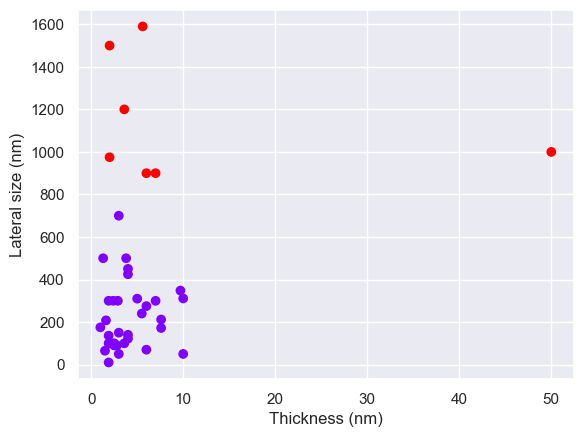

In [11]:
# create a scatter plot based on two corresponding features (thickness and lateral size)
plt.scatter(clusters_scaled['thickness (nm)'], clusters_scaled['width (nm)'], c= clusters_scaled ['cluster_pred'], cmap = 'rainbow')
# name the axes
plt.xlabel('Thickness (nm)')
plt.ylabel('Lateral size (nm)')
plt.show()

## Take Advantage of the Elbow Method

### WCSS

In [12]:
wcss = []
# 'cl_num' is a that keeps track the highest number of clusters we want to use the WCSS method for. 
# We have it set at 10 right now, but it is completely arbitrary.
cl_num = 10
for i in range (1,cl_num):
    kmeans= KMeans(i)
    kmeans.fit(x_scaled)
    wcss_iter = kmeans.inertia_
    wcss.append(wcss_iter)
wcss

C:\Users\danie\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\danie\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\danie\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\danie\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Window

[80.0,
 41.678976402620336,
 12.30858715639378,
 8.618869155474957,
 5.957303572238302,
 3.266565506366088,
 3.0059725843938345,
 2.2826595381631845,
 1.8258498046954665]

### The Elbow Method

Text(0, 0.5, 'Within-cluster Sum of Squares')

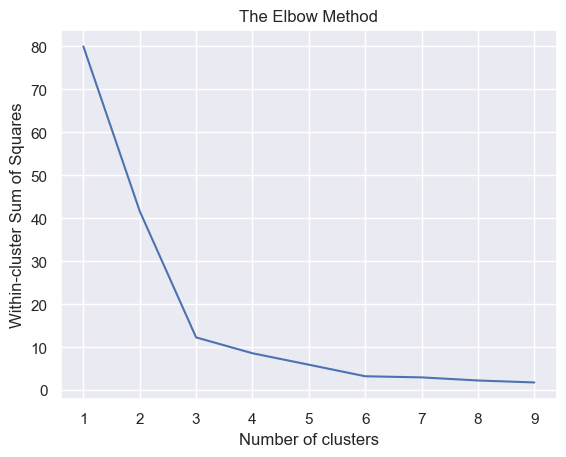

In [13]:
number_clusters = range(1,cl_num)
plt.plot(number_clusters, wcss)
plt.title('The Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('Within-cluster Sum of Squares')

## Understanding the Elbow Curve

Construct and compare the scatter plots to determine which number of clusters is appropriate for further use in our analysis. Based on the Elbow Curve, 2, 3 or 6 seem the most likely.

## 2 clusters

Start by separating the standardized data into 2 clusters (you've already done that!)

In [15]:
# create a k-means object with 2 clusters
kmeans_elbow = KMeans(2)
# fit the data
kmeans_elbow.fit(x_scaled)
# create a copy of data, so we can see the clusters next to the original data
clusters_elbow = data.copy()
# predict the cluster for each observation
clusters_elbow['cluster_pred']=kmeans_elbow.fit_predict(x_scaled)

C:\Users\danie\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\danie\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


Construct a scatter plot of the original data using the standardized clusters

Text(0, 0.5, 'Lateral size (nm)')

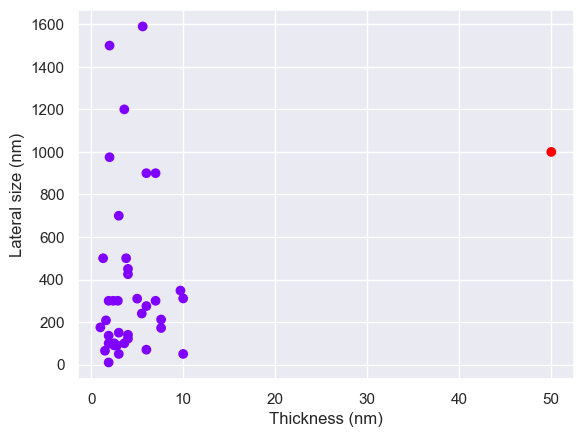

In [16]:
# create a scatter plot based on two corresponding features (sepal_length and sepal_width; OR petal_length and petal_width)
plt.scatter(clusters_elbow['thickness (nm)'], clusters_elbow['width (nm)'], c= clusters_elbow ['cluster_pred'], cmap = 'rainbow')
plt.xlabel('Thickness (nm)')
plt.ylabel('Lateral size (nm)')

## 3 clusters
Redo the same for 3 and 5 clusters

In [21]:
# create a k-means object with 2 clusters
kmeans_elbow = KMeans(3)
# fit the data
kmeans_elbow.fit(x_scaled)
# create a copy of data, so we can see the clusters next to the original data
clusters_elbow = data.copy()
# predict the cluster for each observation
clusters_elbow['cluster_pred']=kmeans_elbow.fit_predict(x_scaled)

C:\Users\danie\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\danie\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


Text(0, 0.5, 'Lateral size (nm)')

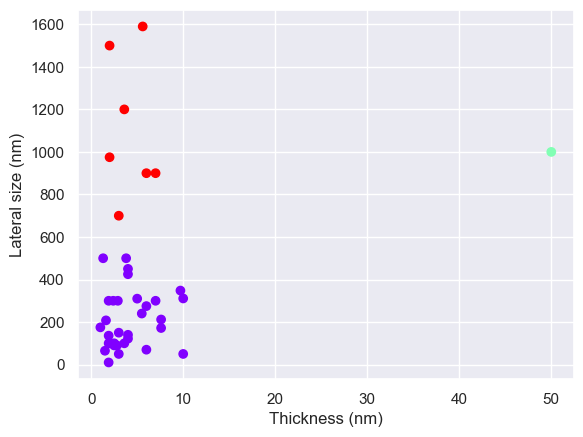

In [22]:
# create a scatter plot based on two corresponding features (sepal_length and sepal_width; OR petal_length and petal_width)
plt.scatter(clusters_elbow['thickness (nm)'], clusters_elbow['width (nm)'], c= clusters_elbow ['cluster_pred'], cmap = 'rainbow')
plt.xlabel('Thickness (nm)')
plt.ylabel('Lateral size (nm)')

In [24]:
clusters_elbow.to_csv('Clustered_LPE_data.csv', index=False)

## 6 clusters

In [19]:
# create a k-means object with 2 clusters
kmeans_elbow = KMeans(6)
# fit the data
kmeans_elbow.fit(x_scaled)
# create a copy of data, so we can see the clusters next to the original data
clusters_elbow = data.copy()
# predict the cluster for each observation
clusters_elbow['cluster_pred']=kmeans_elbow.fit_predict(x_scaled)

C:\Users\danie\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\danie\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


Text(0, 0.5, 'Lateral size (nm)')

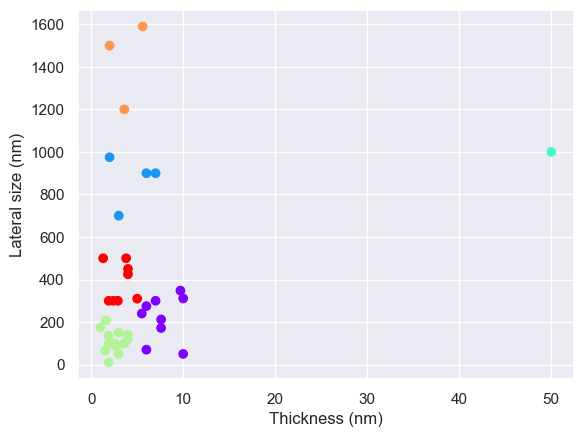

In [20]:
# create a scatter plot based on two corresponding features (sepal_length and sepal_width; OR petal_length and petal_width)
plt.scatter(clusters_elbow['thickness (nm)'], clusters_elbow['width (nm)'], c= clusters_elbow ['cluster_pred'], cmap = 'rainbow')
plt.xlabel('Thickness (nm)')
plt.ylabel('Lateral size (nm)')

3 clusters effectively explain this data, as 